<a href="https://colab.research.google.com/github/hamim23z/CSc47400/blob/main/hw2/CSC47400_HW2_Problem2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
#imports
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat
from scipy.stats import pearsonr

In [14]:
#following the instructions from the assignment, because the .mat file is too big, just using loadmat. And here it just asks
#you to import the file. 'Choose Files'
from google.colab import files
uploaded = files.upload()
from scipy.io import loadmat

data = loadmat('AQUA.2013089.2055.mat')
print(data.keys())

Saving AQUA.2013089.2055.mat to AQUA.2013089.2055 (2).mat
dict_keys(['__header__', '__version__', '__globals__', 'RGB', 'ICE', 'B4', 'B5', 'B6', 'B7', 'B1', 'B2', 'B3'])


In [15]:
b1 = data['B1']
b6 = data['B6']
b7 = data['B7']
N = b1.size

#sample percentage
spercentage = 0.0045
numSamps = int(N * spercentage)

B1 shape: (914, 667)
Total pixels N: 609638
Number of samples: 2743


In [16]:
#random pixels, this code is from the assignment.
samplesInds = np.arange(N)
np.random.shuffle(samplesInds)
samplesInds = samplesInds[:numSamps]

#sampling the bands
b1_samples = b1.ravel()[samplesInds]
b6_samples = b6.ravel()[samplesInds]
b7_samples = b7.ravel()[samplesInds]

In [17]:
def plot_band_comparison(x_samples, y_samples, x_label, y_label, title):
    plt.figure(figsize=(8,5))
    plt.scatter(x_samples, y_samples, alpha=0.1, s=15, c='blue', marker='o', label='Sample Points')

    #linear regression
    slope, intercept = np.polyfit(x_samples, y_samples, 1)
    x_fit = np.array([x_samples.min()*0.9, x_samples.max()*1.1])
    y_fit = np.polyval([slope, intercept], x_fit)
    plt.plot(x_fit, y_fit, 'r-', label='Linear Regression Line')

    #pearson coefficient
    corr, _ = pearsonr(x_samples, y_samples)

    plt.text(0.05, 0.95, "Slope =" + str(round(slope, 2)), transform=plt.gca().transAxes, verticalalignment='top')
    plt.text(0.05, 0.90, "Pearsonr =" + str(round(corr, 2)), transform=plt.gca().transAxes, verticalalignment='top')

    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    plt.legend()
    plt.show()

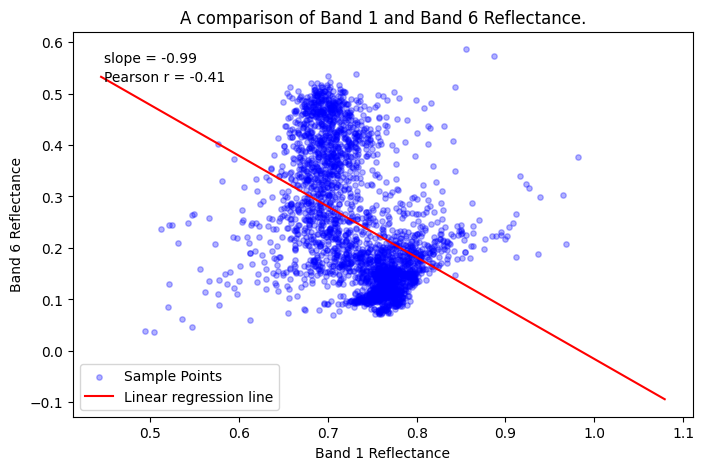

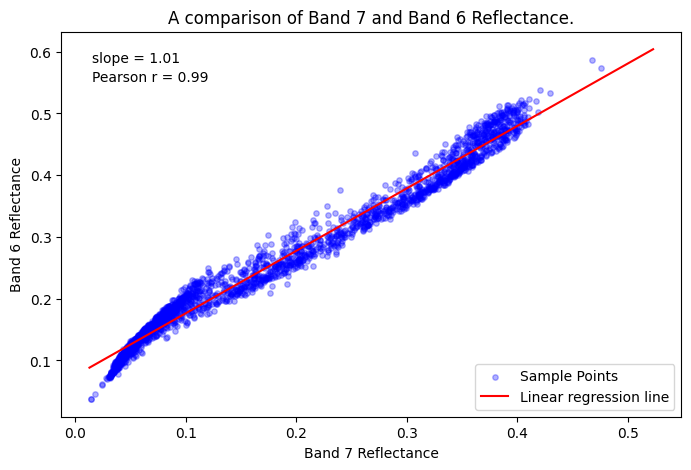

In [18]:
#band 1 vs band 6
plot_band_comparison(
    b1_samples, b6_samples,
    x_label='Band 1 Reflectance',
    y_label='Band 6 Reflectance',
    title='A comparison of Band 1 and Band 6 Reflectance.'
)

#band 7 vs band 6
plot_band_comparison(
    b7_samples, b6_samples,
    x_label='Band 7 Reflectance',
    y_label='Band 6 Reflectance',
    title='A comparison of Band 7 and Band 6 Reflectance.'
)